In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

from uav_env import *

### **state Space**
$(x, y, p_x, p_y, angle, L, mass, intertia)$ : most simplified

### **observation**
(FOV array)

### **Action space**
(Propulsion (acc in facing angle), angular velocity)
```python
thrust, angular_momentum = action
thrust = np.clip(thrust, 0., 1.)
angular_momentum = np.clip(angular_momentum, -1., 1.) * UAV_ANG_POW
thrust_force = thrust_direction * thrust * UAV_THRUST_POW
```
Note the input of thrust and angular momentum needs to be interpretated as 0-100%, -100%-100%

### **Rewards**
*   increase/decrease the closer/durther the agent is to the goal.
*   increase/decrease the larger/smaller the magnitute of velocity $||v||$.
*   increase/decrease the larger/smaller the $\%$ of obstacle in FOV.

The episode receive an additional reward of -100 for crashing.

An episode is considered a solution if it reaches score.

### **Starting State**
The agent starts at the left ceter of the viewpoirt, with a initial $v_x$

### **Episode Termination**
If:
* The agent crashes
* The agent gets outside of the viewport

raw_reward:  [-3.65247485e-02  0.00000000e+00  9.66467541e-01 -2.99535858e+01
 -2.00000000e-03] 
reward:  -130.11888015482427
[ 1.00437498  1.05606248  1.24147571  1.70874385  3.25022574 20.
 20.         20.         20.         20.         20.         20.
  7.6311953   7.37676715 20.         20.          3.25022574  1.7087454
  1.24147571  1.05606248]
state:  [ 1.86652083  0.2960398   0.          0.          0.         -0.03652475
  0.10534533  0.94978125  0.94719688  0.93792621  0.91456281  0.83748871
  0.          0.          0.          0.          0.          0.
  0.          0.61844024  0.63116164  0.          0.          0.83748871
  0.91456273  0.93792621  0.94719688]
0.0 56.307777850333835 0.10534532802708707


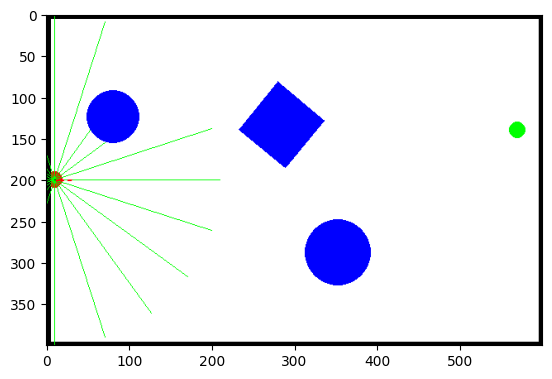

In [2]:
env = SimpleUAVEnv()
env.reset()
total_steps = 10  # Total number of steps in the test
thrust_increment = 1  # Increment in thrust per step
angular_momentum = 0  # Constant angular momentum (for simplicity)

# Run the test
for step in range(total_steps):
    # Gradually increase thrust
    thrust = thrust_increment 

    # Create the action (thrust, angular momentum)
    action = 1

    # Perform a step in the environment
    state, reward, done, raw_reward = env.step(action)

    # Render the current state
    frame = env.render()

    # Break the loop if the episode is done
    if done:
        break

    # Pause for a short time to see the animation
    time.sleep(0.1)

# Close the environment
env.close()
print('raw_reward: ', raw_reward, '\nreward: ', reward)
print(env._get_obs())
print('state: ', state)
print(env.uav.angle,env.dist2goal, env.ang2goal)
plt.imshow(frame)

#raw_reward = np.array((distance_reward/REW_DIST2GOAL,  velocity_reward/REW_VEL, angle_reward/REW_ANGLE, fov_reward, act_reward))

In [3]:
fov_reward = 0
print('OBS Offset: ', OBS_OFFSET, 'UAV Radius: ', UAV_RADIUS)
for distance in env._get_obs():
    print('distance: ', distance, ' PEN: ', env._leakyrelu_penalty(distance, offset=OBS_OFFSET, max_penalty=PEN_COLLISION)*PEN_OBSTACLE)

OBS Offset:  3.0 UAV Radius:  1.0
distance:  1.0043749809265137  PEN:  -99.78125095367432
distance:  1.056062479755811  PEN:  -97.19687601220946
distance:  1.2414757111373218  PEN:  -87.92621444313392
distance:  1.7087438524408776  PEN:  -64.56280737795612
distance:  3.2502257441033806  PEN:  0.0001251128720516903
distance:  20.0  PEN:  0.0085
distance:  20.0  PEN:  0.0085
distance:  20.0  PEN:  0.0085
distance:  20.0  PEN:  0.0085
distance:  20.0  PEN:  0.0085
distance:  20.0  PEN:  0.0085
distance:  20.0  PEN:  0.0085
distance:  7.6311952979232816  PEN:  0.002315597648961641
distance:  7.3767671495107905  PEN:  0.002188383574755395
distance:  20.0  PEN:  0.0085
distance:  20.0  PEN:  0.0085
distance:  3.2502257441033806  PEN:  0.0001251128720516903
distance:  1.7087453955182619  PEN:  -64.5627302240869
distance:  1.2414757111373218  PEN:  -87.92621444313392
distance:  1.056062479755811  PEN:  -97.19687601220946


Episode 50	Average Score: -138.94

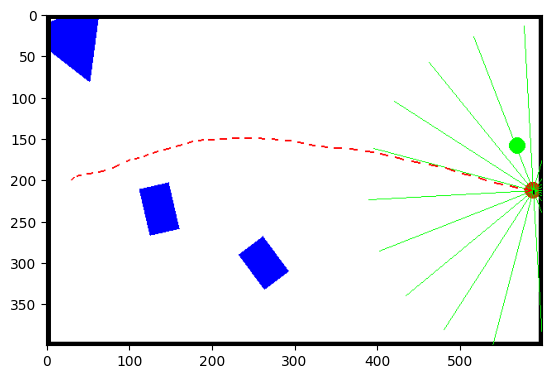

Episode 50	Average Score: -138.94, Eps: 0.778, Terminal vel: 4.237, angle:0.06, dist2goal: 5.77, ang2goal: 1.87, step: 84
Episode 64	Average Score: -127.16Goal reached! Vel:  47.85245895385742


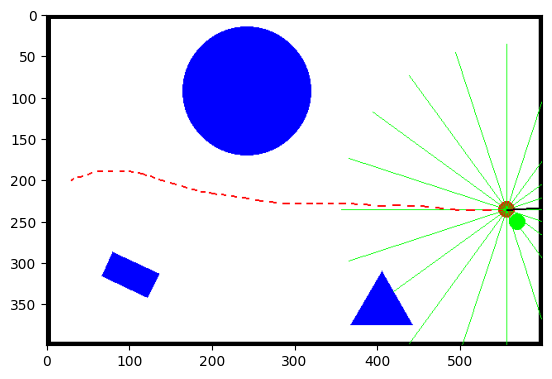

Episode 75	Average Score: -118.27Goal reached! Vel:  70.6762466430664


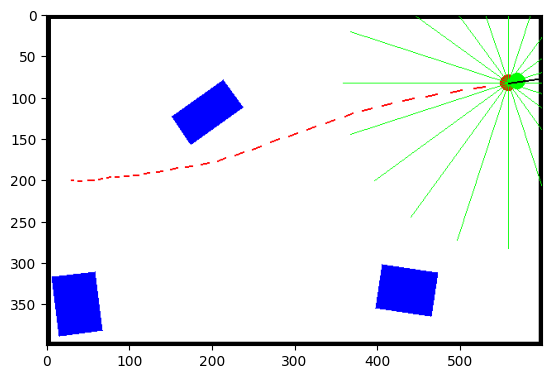

Episode 100	Average Score: -103.43

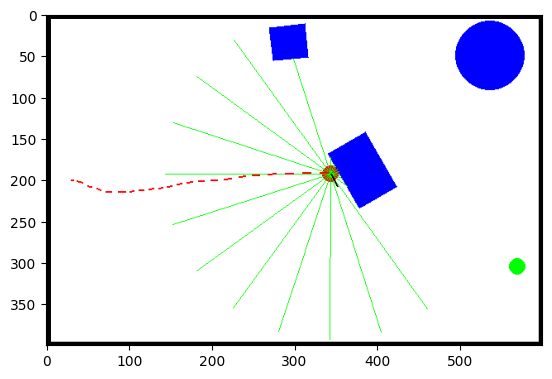

Episode 100	Average Score: -103.43, Eps: 0.606, Terminal vel: 16.998, angle:0.31, dist2goal: 25.19, ang2goal: -0.77, step: 54
Episode 101	Average Score: -101.03Goal reached! Vel:  70.46088409423828


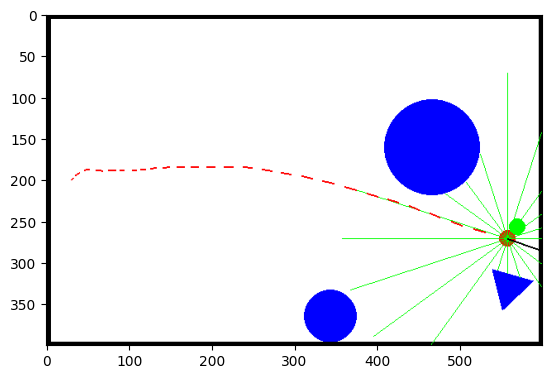

Episode 117	Average Score: -81.91Goal reached! Vel:  73.4875259399414


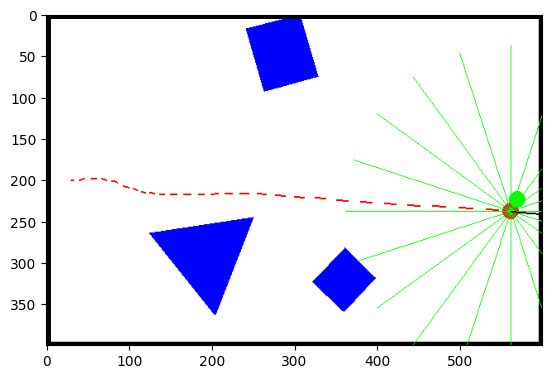

Episode 128	Average Score: -67.64Goal reached! Vel:  73.21125793457031


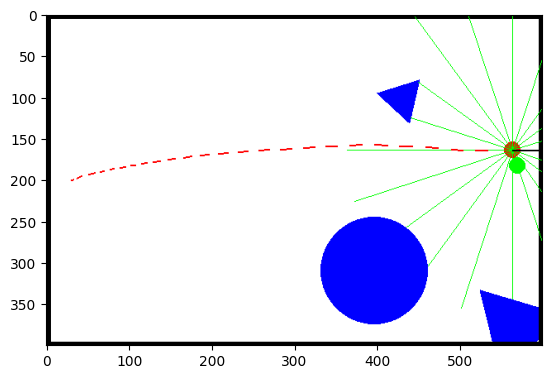

Episode 143	Average Score: -57.88Goal reached! Vel:  61.80459213256836


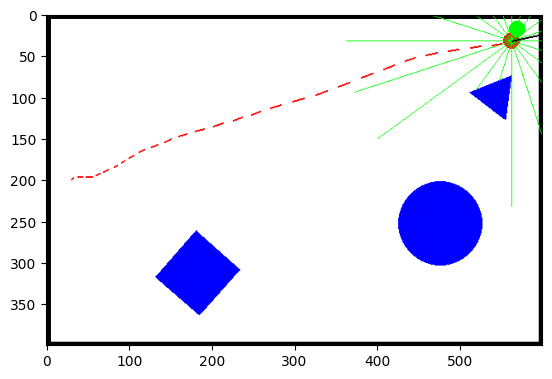

Episode 150	Average Score: -59.29

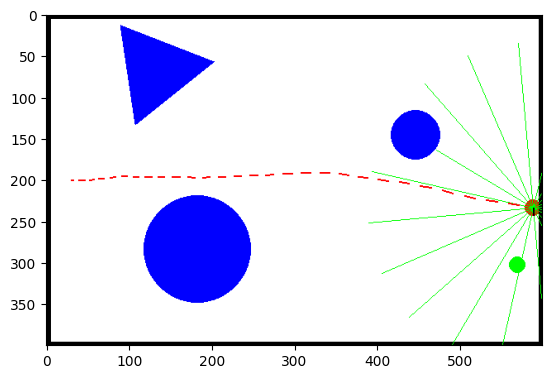

Episode 150	Average Score: -59.29, Eps: 0.471, Terminal vel: 8.474, angle:0.09, dist2goal: 7.15, ang2goal: -1.95, step: 59
Episode 154	Average Score: -59.86Goal reached! Vel:  76.46063995361328


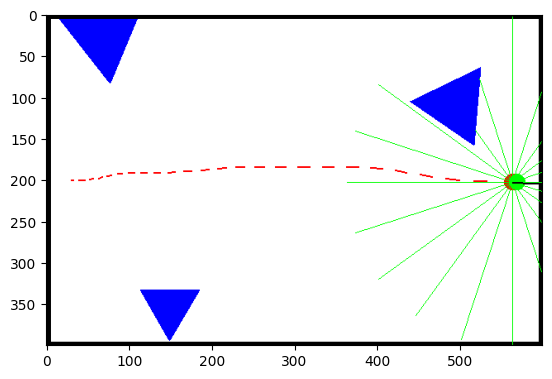

Episode 156	Average Score: -53.93Goal reached! Vel:  22.507905960083008


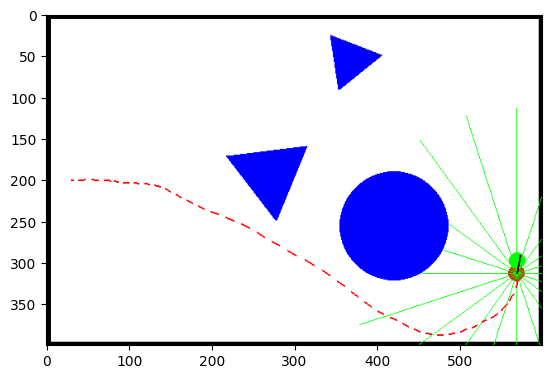

Episode 165	Average Score: -52.99Goal reached! Vel:  70.31694030761719


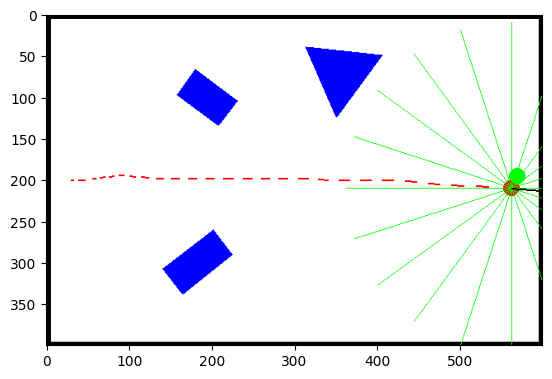

Episode 168	Average Score: -51.56Goal reached! Vel:  76.6591567993164


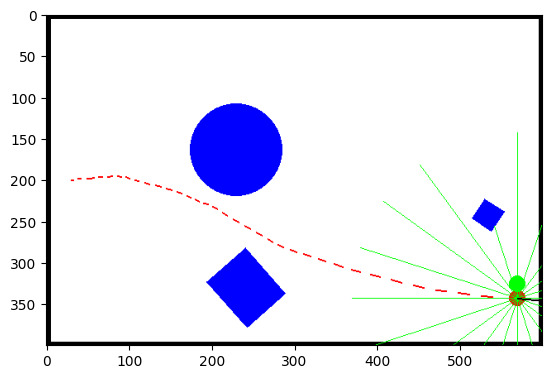

Episode 179	Average Score: -45.58Goal reached! Vel:  73.28042602539062


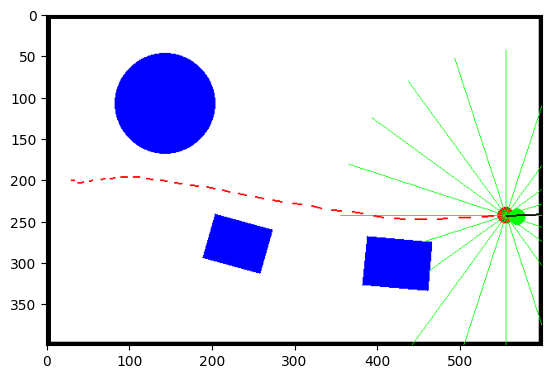

Episode 188	Average Score: -39.75Goal reached! Vel:  73.21125793457031


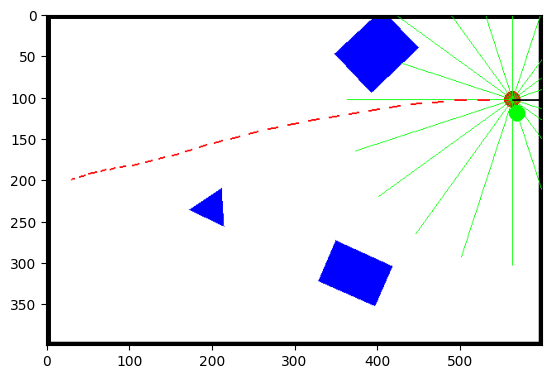

Episode 200	Average Score: -30.20

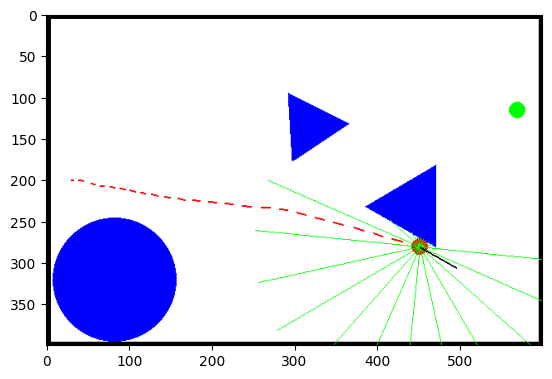

Episode 200	Average Score: -30.20, Eps: 0.367, Terminal vel: 50.747, angle:0.22, dist2goal: 20.29, ang2goal: 0.74, step: 50
Episode 233	Average Score: -21.11Goal reached! Vel:  83.00504302978516


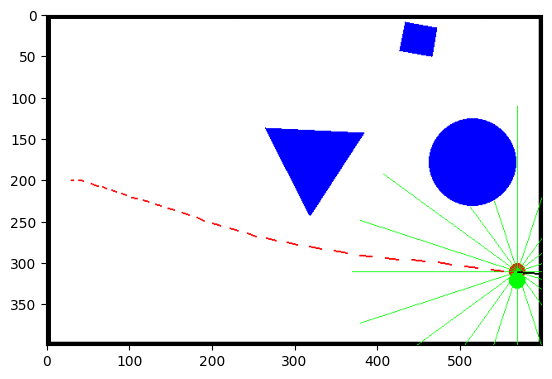

Episode 234	Average Score: -15.86Goal reached! Vel:  67.14752960205078


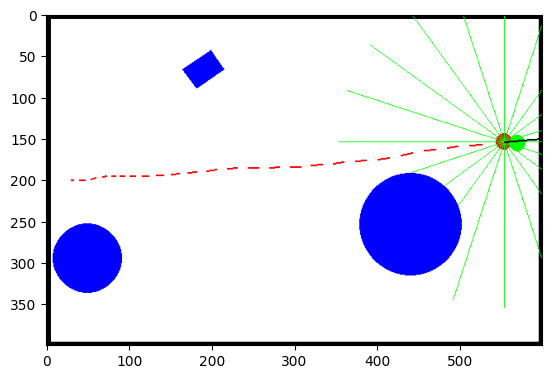

Episode 241	Average Score: -12.81Goal reached! Vel:  76.39435577392578


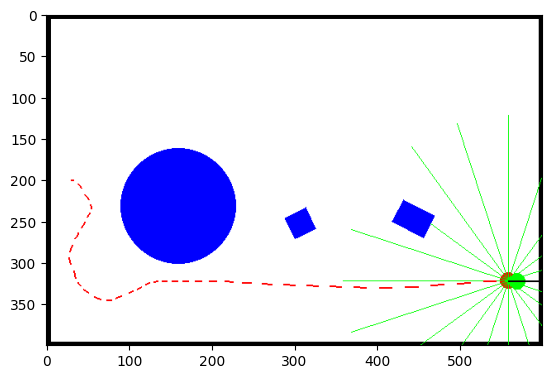

Episode 250	Average Score: -3.162

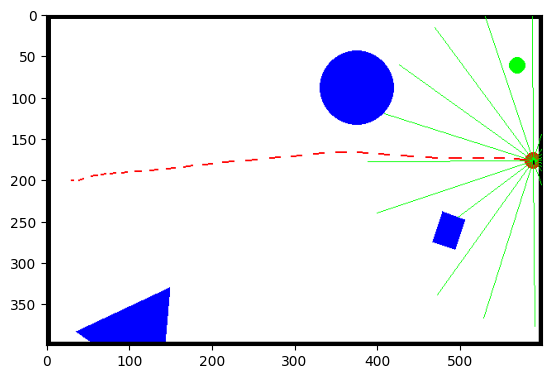

Episode 250	Average Score: -3.16, Eps: 0.286, Terminal vel: 4.237, angle:0.01, dist2goal: 11.60, ang2goal: 1.73, step: 54
Goal reached! Vel:  73.4875259399414


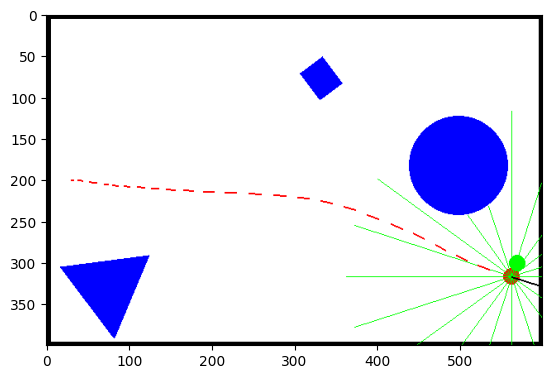

Episode 252	Average Score: 1.16Goal reached! Vel:  73.4875259399414


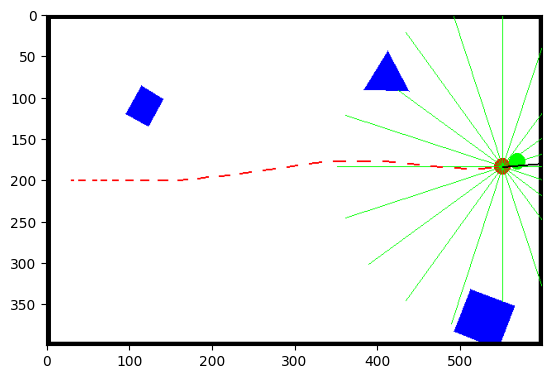

Episode 254	Average Score: 3.53Goal reached! Vel:  41.380279541015625


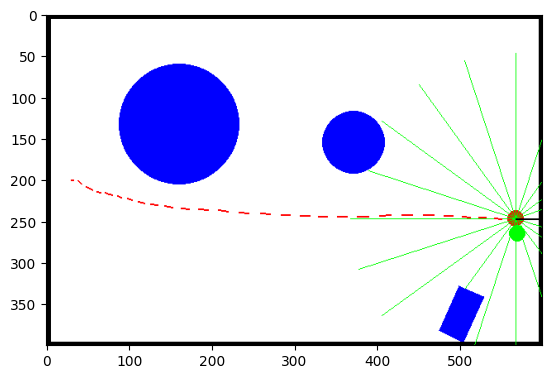

Episode 257	Average Score: 1.90

In [4]:
# Make an environment
env = SimpleUAVEnv()
state_size = STATE_SPACE
action_size = ACTION_SPACE

# Initilize a DQN agent
agent = DQNAgent(state_size, action_size, learning_rate=0.001)

# Train it
scores, final_states_images = train(agent, env, 1000, print_every=50)

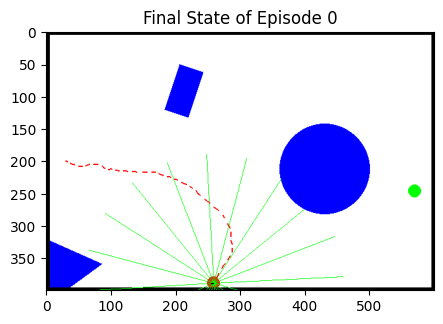

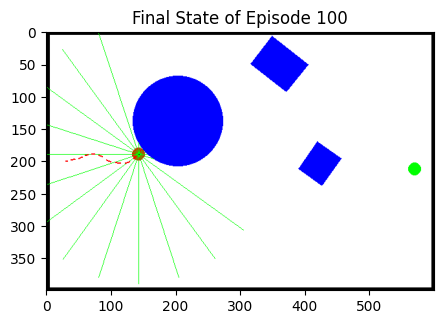

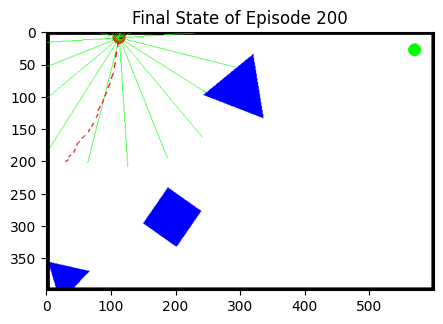

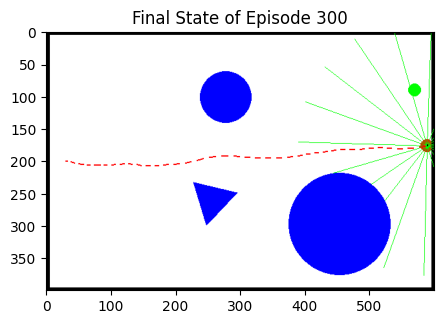

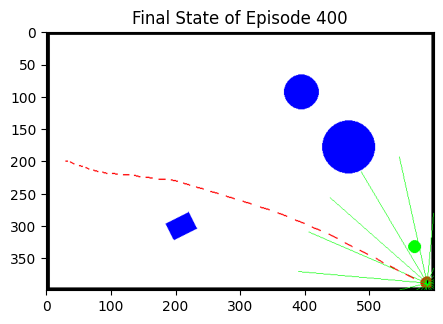

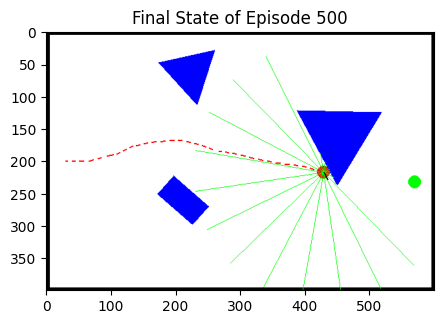

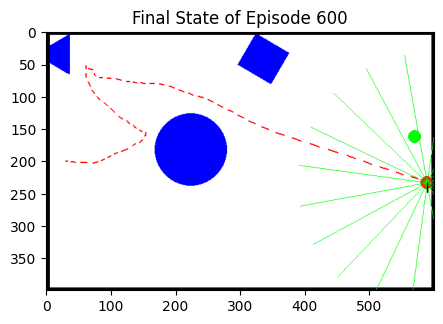

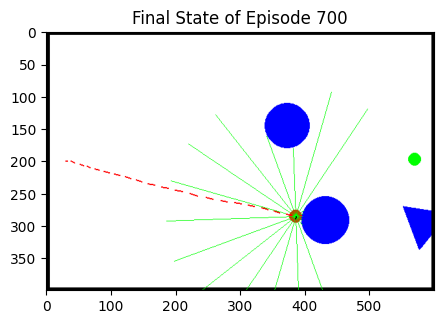

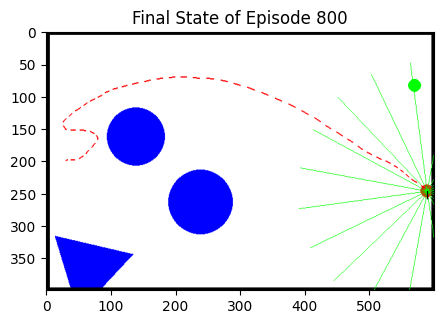

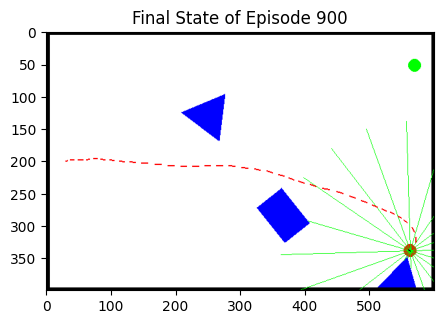

In [ ]:
# Plotting the final states
for i, img in enumerate(final_states_images):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Final State of Episode {i*100}')
    plt.show()